# You can't hurry love, but can try to predict it

## Introduction

This notebook is dedicated to building a model that predicts if the students in this data set might have a romantic interest. For this the k-NN (K-Nearest Neighbor) algorithm is used. 

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. The used dataset comes from a study by P. Cortez and A. Silva (2008).

In [1]:
import seaborn as sns  
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split #We need this to split the data

In [2]:
df = pd.read_csv("student-por.csv") #import data file
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Exlore the data

Since the data set has quite some columns, let's first get insight in all the columns and their datatype. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
df['romantic'].value_counts()

no     410
yes    239
Name: romantic, dtype: int64

### Dummy variables

In order to check the correlation of the 'Romance' variable with the other data via the python correlation function dummies variables of categorical variables are created. 

In [5]:
dummies = pd.get_dummies(df['school']) #create dummy variable
pd.get_dummies(df['school']) 
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['sex'])
pd.get_dummies(df['sex'])
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['famsize'])
pd.get_dummies(df['famsize'])
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['Mjob'])
pd.get_dummies(df['Mjob'])
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['Fjob'])
pd.get_dummies(df['Fjob'])
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['reason'])
pd.get_dummies(df['reason'])
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['guardian'])
pd.get_dummies(df['guardian'])
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['schoolsup'])
pd.get_dummies(df['schoolsup'])
dummies.columns = ["No schoolsup", "Yes schoolsup"] #rename columns, otherwise the columns would be named 'No/Yes'
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['famsup'])
pd.get_dummies(df['famsup'])
dummies.columns = ["No famsup", "Yes famsup"] 
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['paid'])
pd.get_dummies(df['paid'])
dummies.columns = ["No paid", "Yes paid"]
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['nursery'])
pd.get_dummies(df['nursery'])
dummies.columns = ["No nursery", "Yes nursery"]
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['higher'])
pd.get_dummies(df['higher'])
dummies.columns = ["No higher", "Yes higher"]
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['internet'])
pd.get_dummies(df['internet'])
dummies.columns = ["No internet", "Yes internet"]
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['romantic'])
pd.get_dummies(df['romantic'])
dummies.columns = ["No romance", "Yes romance"]
df = pd.concat([df, dummies], axis=1)

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,No paid,Yes paid,No nursery,Yes nursery,No higher,Yes higher,No internet,Yes internet,No romance,Yes romance
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,0,0,1,0,1,1,0,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,0,1,0,0,1,0,1,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,0,0,1,0,1,0,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,0,0,1,0,1,0,1,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,0,0,1,0,1,1,0,1,0


In [6]:
corr = df.corr().round(2) #create correlation table
corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,No paid,Yes paid,No nursery,Yes nursery,No higher,Yes higher,No internet,Yes internet,No romance,Yes romance
age,1.00,-0.11,-0.12,0.03,-0.01,0.32,-0.02,-0.00,0.11,0.13,...,0.01,-0.01,0.02,-0.02,0.27,-0.27,-0.01,0.01,-0.18,0.18
Medu,-0.11,1.00,0.65,-0.27,0.10,-0.17,0.02,-0.02,0.01,-0.01,...,-0.11,0.11,-0.13,0.13,-0.21,0.21,-0.27,0.27,0.03,-0.03
Fedu,-0.12,0.65,1.00,-0.21,0.05,-0.17,0.02,0.01,0.03,0.00,...,-0.09,0.09,-0.07,0.07,-0.19,0.19,-0.18,0.18,0.07,-0.07
traveltime,0.03,-0.27,-0.21,1.00,-0.06,0.10,-0.01,0.00,0.06,0.09,...,0.04,-0.04,0.01,-0.01,0.07,-0.07,0.19,-0.19,-0.00,0.00
studytime,-0.01,0.10,0.05,-0.06,1.00,-0.15,-0.00,-0.07,-0.08,-0.14,...,0.00,-0.00,-0.04,0.04,-0.19,0.19,-0.04,0.04,-0.03,0.03
failures,0.32,-0.17,-0.17,0.10,-0.15,1.00,-0.06,0.11,0.05,0.11,...,-0.07,0.07,0.07,-0.07,0.31,-0.31,0.10,-0.10,-0.07,0.07
famrel,-0.02,0.02,0.02,-0.01,-0.00,-0.06,1.00,0.13,0.09,-0.08,...,-0.03,0.03,-0.04,0.04,-0.05,0.05,-0.08,0.08,0.04,-0.04
freetime,-0.00,-0.02,0.01,0.00,-0.07,0.11,0.13,1.00,0.35,0.11,...,0.05,-0.05,0.01,-0.01,0.10,-0.10,-0.06,0.06,-0.03,0.03
goout,0.11,0.01,0.03,0.06,-0.08,0.05,0.09,0.35,1.00,0.25,...,0.01,-0.01,-0.02,0.02,0.07,-0.07,-0.09,0.09,0.00,-0.00
Dalc,0.13,-0.01,0.00,0.09,-0.14,0.11,-0.08,0.11,0.25,1.00,...,-0.05,0.05,0.08,-0.08,0.13,-0.13,-0.04,0.04,-0.06,0.06


### Pick variables

In order to predict the variable 'Romantic' the variables showing the highest correlation are selected and plotted for further investiation. 

Explanation of chosen variables:

- Romantic - with a romantic relationship (binary: yes or no)
- Sex - student's sex (binary: 'F' - female or 'M' - male)
- Age - student's age (numeric: from 15 to 22)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- Guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- Failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- Schoolsup - extra educational support (binary: yes or no)
- Higher - wants to take higher education (binary: yes or no)
- Absences - number of school absences (numeric: from 0 to 93)
- G2 - second period grade (numeric: from 0 to 20): (These grades are related with the course subject, Math or Portuguese)


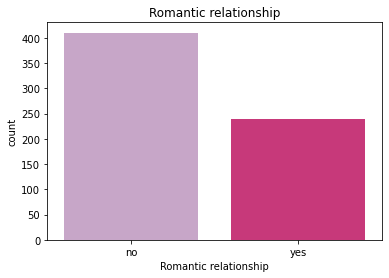

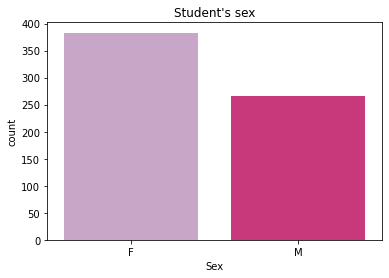

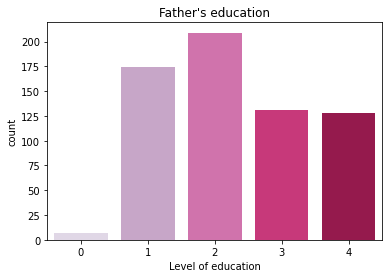

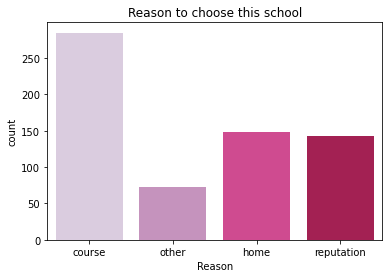

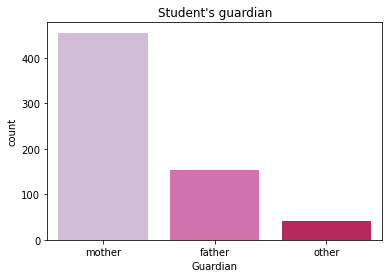

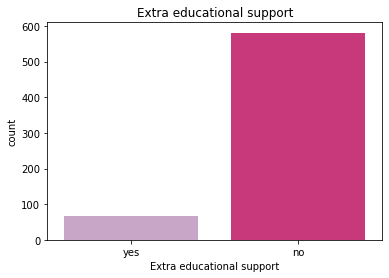

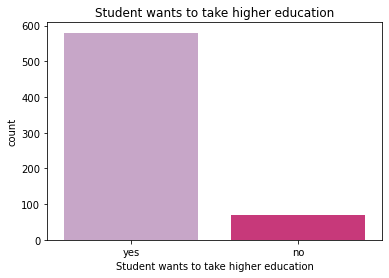

In [7]:
sns.countplot(x="romantic", data=df, palette="PuRd")
plt.title("Romantic relationship")
plt.xlabel('Romantic relationship')
plt.show()

sns.countplot(x="sex", data=df, palette="PuRd")
plt.title("Student's sex")
plt.xlabel('Sex')
plt.show()

sns.countplot(x="Fedu", data=df, palette="PuRd")
plt.title("Father's education")
plt.xlabel("Level of education")
plt.show()

sns.countplot(x="reason", data=df, palette="PuRd")
plt.title("Reason to choose this school")
plt.xlabel('Reason')
plt.show()

sns.countplot(x="guardian", data=df, palette="PuRd")
plt.title("Student's guardian")
plt.xlabel('Guardian')
plt.show()

sns.countplot(x="schoolsup", data=df, palette="PuRd")
plt.title("Extra educational support")
plt.xlabel('Extra educational support')
plt.show()

sns.countplot(x="higher", data=df, palette="PuRd")
plt.title("Student wants to take higher education")
plt.xlabel('Student wants to take higher education')
plt.show()

When looking at the categorical variables, some variables are not that useful. For example, the correlation model shows a strong correlation between the 'romance' variable and the 'other' variable in the column 'guardian'. The plot shows that only a very few students have an 'other' guardian, therefore if in that category the amount of students with a romantic interest is relatively high, it could lead to overfitting in the model. We leave this variable out. 

(Hopefully I interpreted this right?)

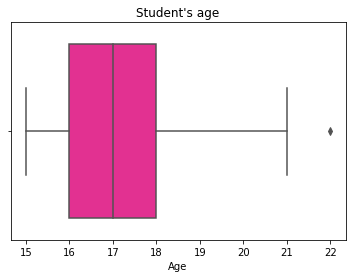

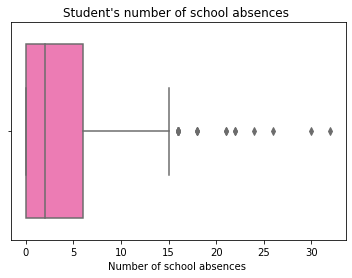

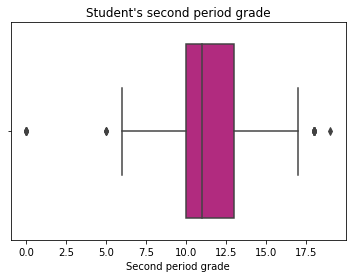

In [8]:
sns.boxplot(x=df["age"], color="#FF1493")
plt.title("Student's age")
plt.xlabel('Age')
plt.show()

sns.boxplot(x=df["absences"], color="#FF69B4")
plt.title("Student's number of school absences ")
plt.xlabel('Number of school absences ')
plt.show()


sns.boxplot(x=df["G2"], color="#C71585")
plt.title("Student's second period grade")
plt.xlabel('Second period grade')
plt.show()

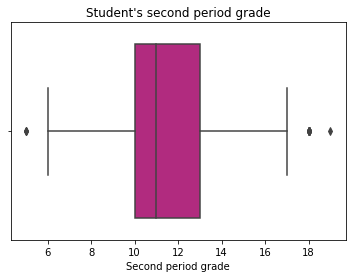

In [9]:
df = df[df["G2"] > 1]

sns.boxplot(x=df["G2"], color="#C71585")
plt.title("Student's second period grade")
plt.xlabel('Second period grade')
plt.show()

In [10]:
df_sub = df[['M', 'age', 'Fedu', 'reputation', 'failures', 'No schoolsup', 'Yes higher', 'absences', 'G2', 'Yes romance']]
df_sub.head()

,M,age,Fedu,reputation,failures,No schoolsup,Yes higher,absences,G2,Yes romance
0,0,18,4,0,0,0,1,4,11,0
1,0,17,1,0,0,1,1,2,11,0
2,0,15,1,0,0,0,1,6,13,0
3,0,15,2,0,0,1,1,0,14,1
4,0,16,3,0,0,1,1,0,13,0


In [11]:
corr = df_sub.corr().round(2)
corr

,M,age,Fedu,reputation,failures,No schoolsup,Yes higher,absences,G2,Yes romance
M,1.00,-0.04,0.08,-0.02,0.08,0.11,-0.06,0.02,-0.11,-0.11
age,-0.04,1.00,-0.12,-0.02,0.31,0.17,-0.25,0.16,-0.07,0.18
Fedu,0.08,-0.12,1.00,0.08,-0.16,-0.02,0.19,0.02,0.22,-0.06
reputation,-0.02,-0.02,0.08,1.00,-0.11,-0.02,0.09,0.02,0.20,-0.07
failures,0.08,0.31,-0.16,-0.11,1.00,-0.00,-0.29,0.14,-0.37,0.06
No schoolsup,0.11,0.17,-0.02,-0.02,-0.00,1.00,-0.08,0.06,0.08,0.09
Yes higher,-0.06,-0.25,0.19,0.09,-0.29,-0.08,1.00,-0.14,0.32,-0.11
absences,0.02,0.16,0.02,0.02,0.14,0.06,-0.14,1.00,-0.18,0.09
G2,-0.11,-0.07,0.22,0.20,-0.37,0.08,0.32,-0.18,1.00,-0.07
Yes romance,-0.11,0.18,-0.06,-0.07,0.06,0.09,-0.11,0.09,-0.07,1.00


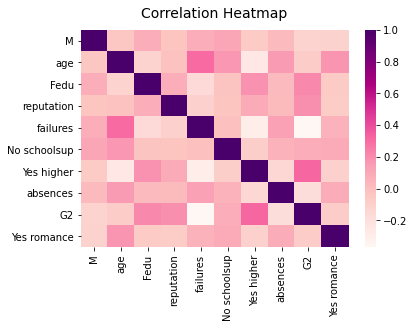

In [12]:
heatmap = sns.heatmap(df_sub.corr(), cmap="RdPu") 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

## Building the model

In [13]:
X = df_sub[['M', 'age', 'Fedu', 'reputation', 'failures', 'No schoolsup', 'Yes higher', 'absences', 'G2']] #create the X matrix

y = df['Yes romance'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train.head() #show the head of the training set

,M,age,Fedu,reputation,failures,No schoolsup,Yes higher,absences,G2
478,0,16,1,0,3,0,1,0,7
68,0,15,2,1,0,0,1,0,10
475,0,15,2,0,0,1,1,0,13
630,0,18,4,1,0,1,1,0,17
118,1,17,3,0,1,1,1,14,11


In [14]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(10) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data

## Model evaluation

Let's start by calculating accuracy. As always, we do the evaluation on the test data.

In [15]:
knn.score(X_test, y_test) #calculate the fit on the *test* data

0.6373056994818653

Accuracy is 63,7%. The baseline guess with the variable "No romance" (410 / (410 + 239) is 63.1%. Unfortunately, this means our model is only 0.07% more accurate.

Let's create a confusion matrix to evaluate precision and recall.

In [16]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[114,   9],
       [ 61,   9]])

In [17]:
conf_matrix = pd.DataFrame(cm, index=['No romantic interest (actual)', 'Romantic interest (actual)'], columns = ['No romantic interest (predicted)', 'Romantic interest (predicted)']) 
conf_matrix

,No romantic interest (predicted),Romantic interest (predicted)
No romantic interest (actual),114,9
Romantic interest (actual),61,9


#### Accuracy

In [21]:
(114 + 9) / (114+61+9+9)

0.6373056994818653

#### Precision (Romantic interest)

In [20]:
9 / (9+9)

0.5

#### Recall (Romantic interest)

In [19]:
9/(61+9)

0.12857142857142856

In [18]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall

With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       123
           1       0.38      0.33      0.35        70

    accuracy                           0.56       193
   macro avg       0.51      0.51      0.51       193
weighted avg       0.55      0.56      0.56       193

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.64      0.89      0.75       123
           1       0.41      0.13      0.20        70

    accuracy                           0.62       193
   macro avg       0.53      0.51      0.47       193
weighted avg       0.56      0.62      0.55       193

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.64      0.76      0.69       123
           1       0.38      0.26      0.31        70

    accuracy                           0.58       193
   macro avg       0.51      0.5

## References

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.